## Fake News Detection - Explainable

Goal: Development of fake news detection algorithm for German language with high explainability and interpretability using sentiment analysis.

Significance & Contribution: 

- Enhancement of user’s trust and understanding of the detection process

- Tool to identify fake news in German language

- Contribution to the field of explainable AI as well as providing insights into the effectiveness of sentiment analysis in German fake news detection

Research Gap:Need for transparent German fake news detection algorithm providing interpretable explanations for its classifier decisions.

Research Question: "How can sentiment analysis be leveraged to develop a transparent and explainable algorithm for detecting fake news in German language, ensuring users have a clear understanding of the decision-making process?"


##### 1. Getting a Labelled German & English Dataset

##### 2. Data Cleaning

1. Getting rid of features denoting to the publisher, source, or category
2. Removing stopwords
3. Create an equal data set containing the same amount of thruthful and fake news
4. Removing words which might bias/distort the results such as information on the source 

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

### German data set

In [2]:
# import cleaned data set (see step 2)
df_de = pd.read_csv('news_cleaned_de.csv')
df_de.drop(df_de.columns[0],axis = 1, inplace=True)
df_de

,Titel,Body,Fake
0,Gelesene Lerninhalte werden schnell vergessen,Umsetzung neuer Erkenntnisse im schulischen Al...,0
1,Letta: Italien muss Fokus auf Wachstum legen,Das hoch verschuldete Italien muss seine Wirts...,0
2,Nato-Partner kommen Trump bei Finanzforderunge...,Die Nato-Verbündeten wollen US-Präsident Donal...,0
3,Im Jemen schwere Kämpfe trotz Feuerpause,Im Jemen ist es trotz der Feuerpause zu schwer...,0
4,Zeitung: Mindestlohn soll frühestens 2016 kommen,Bei den Koalitionsverhandlungen über den Minde...,0
...,...,...,...
9249,Streit um Kostenbeteiligung eskaliert: Werder ...,teilen teilen twittern teilen teilen e-mail \n...,1
9250,Internet erscheint erstmals als Buch,teilen teilen twittern teilen teilen e-mail \n...,1
9251,Keine GroKo-Abstimmungsunterlagen erhalten: Af...,teilen teilen twittern teilen teilen e-mail \n...,1
9252,Trauer in Deutschland: Karin Engelbart gestorben,teilen teilen twittern teilen teilen e-mail \n...,1


##### 3. Apply Tf-IDf

TF-IDF stands for Term Frequency-Inverse Document Frequency, and it is a commonly used technique in text mining and information retrieval to quantify the importance of words in a document or a collection of documents. In the context of fake news detection task, TF-IDF can help identify the most relevant words or features that contribute to distinguishing between fake and truthful news.

Here's a short overview of what TF-IDF does:

- Term Frequency (TF): It measures the frequency of a term (word) within a document. The idea is that words that appear more frequently within a document might be more important or representative of its content. TF is calculated by counting the occurrences of each word in a document and normalizing it by the total number of words in the document.

- Inverse Document Frequency (IDF): It measures the rarity or uniqueness of a term across the entire document collection. The intuition is that words that appear in many documents are less informative than words that appear in only a few documents. IDF is calculated by dividing the total number of documents by the number of documents that contain a specific word, and then taking the logarithm of the result. This logarithmic scaling helps give more weight to rare words.

- TF-IDF: It combines the TF and IDF measures to compute a weighted score for each word in a document. The TF-IDF score is calculated by multiplying the TF of a word by the IDF of the word. This score reflects the importance of a word in a specific document relative to its importance in the entire document collection.


In [3]:
# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the 'Titel' and 'Body' columns
tfidf_matrix = vectorizer.fit_transform(df_de['Titel'] + ' ' + df_de['Body'])

# Perform feature selection to reduce dimensionality
k = 1000  # Number of top features to select ---> restrict to 1000 otherwise the matrix gets to large 
selector = SelectKBest(chi2, k=k)
tfidf_matrix_selected = selector.fit_transform(tfidf_matrix, df_de['Fake'])

# Get the selected feature names
feature_names = [vectorizer.get_feature_names()[i] for i in selector.get_support(indices=True)]

# Convert the tfidf_matrix_selected to a DataFrame and concatenate with the original one
tfidf_df = pd.DataFrame(tfidf_matrix_selected.toarray(), columns=feature_names)
df_de = pd.concat([df_de, tfidf_df], axis=1)

print(df_de)


                                                  Titel  \
0         Gelesene Lerninhalte werden schnell vergessen   
1          Letta: Italien muss Fokus auf Wachstum legen   
2     Nato-Partner kommen Trump bei Finanzforderunge...   
3              Im Jemen schwere Kämpfe trotz Feuerpause   
4      Zeitung: Mindestlohn soll frühestens 2016 kommen   
...                                                 ...   
9249  Streit um Kostenbeteiligung eskaliert: Werder ...   
9250               Internet erscheint erstmals als Buch   
9251  Keine GroKo-Abstimmungsunterlagen erhalten: Af...   
9252   Trauer in Deutschland: Karin Engelbart gestorben   
9253  Versehentlich Gleise und Schienen eingebaut: B...   

                                                   Body  Fake   00       000  \
0     Umsetzung neuer Erkenntnisse im schulischen Al...     0  0.0  0.000000   
1     Das hoch verschuldete Italien muss seine Wirts...     0  0.0  0.000000   
2     Die Nato-Verbündeten wollen US-Präsident Dona

##### 4. Apply a logistric regression model

It is a higly interpretable model investigating the relationshep between the input features and the probability of a particular outcome using the logistic function.The coefficients associated with each feature represent the direction and magnitude of their influence on the predicted outcome.

In [4]:
# Create train test split with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df_de['Fake'], test_size=0.2, random_state=35)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Check accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9713668287412209


##### 5. Check the features which are relevant for the decision with their importance score

In [5]:
# Get the feature names from the TfidfVectorizer
feature_names = vectorizer.get_feature_names()

# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Create a DataFrame to store the feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients in descending order based on their absolute values
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values('Absolute Coefficient', ascending=False)

print(coefficients_df.head(20))


            Feature  Coefficient  Absolute Coefficient
66467          http    -7.807566              7.807566
48687          foto     6.851753              6.851753
115155        sagte    -6.402253              6.402253
7453             am    -5.456298              5.456298
123143           so     5.137136              5.137136
64220         heute     4.990746              4.990746
31955           die    -4.677929              4.677929
153825          www    -4.521252              4.521252
67528           ich     4.266538              4.266538
107205      prozent    -4.129255              4.129255
67896            im    -4.039715              4.039715
98173           nun     3.875072              3.875072
31268           der    -3.552918              3.552918
152388          wir     3.411267              3.411267
61886         hatte    -3.352475              3.352475
139451  unternehmen    -3.295880              3.295880
68310            in    -3.272304              3.272304
105715   p

##### 6. Try different model - Decision trees

Decision trees are hierarchical models that make decisions by recursively splitting the data based on feature values.
Decision trees provide a transparent decision-making process since one can trace the tree's path from the root node to a leaf node to understand how decisions are made based on the feature values.

In [6]:
from sklearn.tree import DecisionTreeClassifier

# Train a Decision Tree classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Check accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9292274446245273


##### 7. Try different model - Random forest

Random forest models provide feature importances, which indicate the relative importance of each feature for making predictions. It creates a collection of decision trees, where each tree is trained on a different subset of the data and a random subset of features.

In [7]:
# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=35)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Check accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9773095623987034


#### 8.Show important features for the Random Forest model


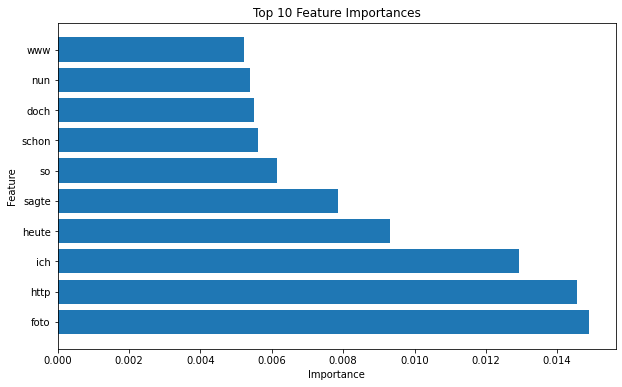

In [8]:
# Get feature importances from the Random Forest model
importances = model.feature_importances_

# Get the feature names from the TfidfVectorizer
feature_names = vectorizer.get_feature_names()

# Create dataframe to store variables 
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'][:10], feature_importances_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()


### English data set (balanced)

In [9]:
# import english cleaned data set (see Step 2 - initial section)
df_en = pd.read_csv('news_cleaned_en.csv')
df_en.drop(df_en.columns[0],axis = 1, inplace=True)
df_en

,Titel,Body,Fake
0,Watch Darrel Issa Get Booed After Being A Tot...,"There may have been a time, many years ago, wh...",1
1,"OBAMA’S GUN-RUNNING, Lying, Race-Baiting AG Is...",Please please please let it be a 3-way race be...,1
2,Trump Makes Startling Admission About His Wif...,With Donald Trump taking the Republican Party ...,1
3,Meet The INCREDIBLY Racist GOP Senator That J...,After failing to denounce or renounce an endor...,1
4,BREAKING: MITT ROMNEY Speaks To Reporters Foll...,https://youtu.be/Ai5ayloRa-0,1
...,...,...,...
8225,Trump to set new executive orders on environme...,U.S. President Donald Trump this week will sig...,0
8226,Trump condemns anti-Semitism on Israel's Holoc...,U.S. President Donald Trump said anti-Semitism...,0
8227,Trump pressures Democrats on Obamacare to get ...,President Donald Trump put pressure on Democra...,0
8228,Homeland Security not targeting Dreamers: Kelly,The Department of Homeland Security will not t...,0


In [10]:
# Apply Tfidf

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the 'Titel' and 'Body' columns
tfidf_matrix = vectorizer.fit_transform(df_en['Titel'] + ' ' + df_en['Body'])

# Perform feature selection to reduce dimensionality
k = 1000  # Number of top features to select ---> restrict to 1000 otherwise it gets to large
selector = SelectKBest(chi2, k=k)
tfidf_matrix_selected = selector.fit_transform(tfidf_matrix, df_en['Fake'])

# Get the selected feature names
feature_names = [vectorizer.get_feature_names()[i] for i in selector.get_support(indices=True)]

# Convert the tfidf_matrix_selected to dataframe and concatenate with the original one
tfidf_df = pd.DataFrame(tfidf_matrix_selected.toarray(), columns=feature_names)
df_en = pd.concat([df_en, tfidf_df], axis=1)

print(df_en)

                                                  Titel  \
0      Watch Darrel Issa Get Booed After Being A Tot...   
1     OBAMA’S GUN-RUNNING, Lying, Race-Baiting AG Is...   
2      Trump Makes Startling Admission About His Wif...   
3      Meet The INCREDIBLY Racist GOP Senator That J...   
4     BREAKING: MITT ROMNEY Speaks To Reporters Foll...   
...                                                 ...   
8225  Trump to set new executive orders on environme...   
8226  Trump condemns anti-Semitism on Israel's Holoc...   
8227  Trump pressures Democrats on Obamacare to get ...   
8228    Homeland Security not targeting Dreamers: Kelly   
8229  Trump says Mexico 'eventually' will pay for bo...   

                                                   Body  Fake  2016      2017  \
0     There may have been a time, many years ago, wh...     1   0.0  0.000000   
1     Please please please let it be a 3-way race be...     1   0.0  0.000000   
2     With Donald Trump taking the Republican Pa

In [11]:
# Apply random forest since it had the best accuracy with the german dataset 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df_en['Fake'], test_size=0.2, random_state=35)

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=35)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.968408262454435


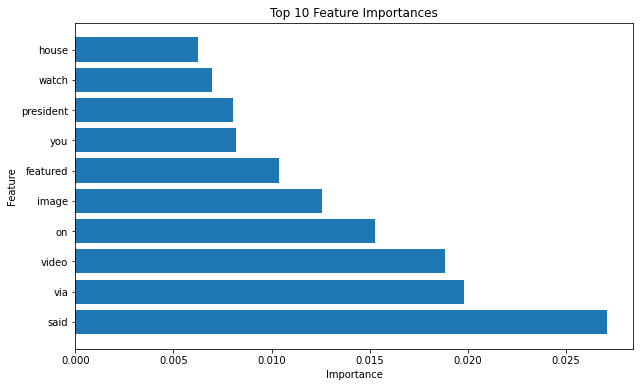

In [12]:
# Show important features for decision making

# Get feature importances from the Random Forest model
importances = model.feature_importances_

# Get the feature names from the TfidfVectorizer
feature_names = vectorizer.get_feature_names()

# Create dataframe to store variables 
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'][:10], feature_importances_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()


### English data set (unbalanced)

In [13]:
# import english cleaned data set (see Step 2 - initial section)
df_en_unbalanced = pd.read_csv('news_unbalanced_en.csv')
df_en_unbalanced.drop(df_en_unbalanced.columns[0],axis = 1, inplace=True)
df_en_unbalanced

,Titel,Body,Fake
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,0
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,0
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,0
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,0
...,...,...,...
24671,CLINTON PAL AND FORMER GOVERNOR: Ugly Women Wo...,The Democrat s war on mostly ugly women Forme...,1
24672,TWO RICH WHITE GUYS Who Made A Fortune Selling...,Two white guys living in a state where 96% of ...,1
24673,“FLUSH TARGET” Truck Will Travel To Every Stor...,This highly visible campaign has nothing to do...,1
24674,SEX ROULETTE PARTIES On The Rise…One Person Is...,Culture rot The health professionals who will ...,1


In [14]:
# Apply the trained model from beforehand to the unbalanced dataset

# Vectorize the text in the new dataset using the same vectorizer 
new_features = vectorizer.transform(df_en_unbalanced['Titel'] + ' ' + df_en_unbalanced['Body'])

# Make predictions using the trained Random Forest model
new_predictions = model.predict(new_features)

# Add the predictions to the new dataset DataFrame
df_en_unbalanced['Predictions'] = new_predictions

# Display the updated DataFrame with predictions
print(df_en_unbalanced)


                                                   Titel  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
24671  CLINTON PAL AND FORMER GOVERNOR: Ugly Women Wo...   
24672  TWO RICH WHITE GUYS Who Made A Fortune Selling...   
24673  “FLUSH TARGET” Truck Will Travel To Every Stor...   
24674  SEX ROULETTE PARTIES On The Rise…One Person Is...   
24675  How TYSON FOODS Is DESTROYING Small Towns…Forc...   

                                                    Body  Fake  Predictions  
0      The head of a conservative Republican faction ...     0            0  
1      Transgender people will be allowed for the fir...     0            0  
2      The special counsel investigation of l

In [15]:
# Compute the accuracy of the predictions
accuracy = accuracy_score(df_en_unbalanced['Fake'], new_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9736991408656184
